In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()


from src.utils import pd, np, plt

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette


In [2]:
# cargamos los datos
#data_RF = pd.read_csv("./data/Melbourne_housing_FULL.csv",sep=',')
data_RF = pd.read_csv("./data/Seleccion_variables_RF.csv",sep=',')
data_RF = data_RF.drop('Unnamed: 0',axis=1)

columns=['Rooms','Distance','Postcode','Bathroom','Car','Landsize','Propertycount','Distancia_NEW','Longtitude','Lattitude','Location_TRA','Price']
data_RF=data_RF[columns]
#ponemos la columna precio al final

data_RF.head(5)
data_RF.describe()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price
count,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,2.705600e+04
mean,2.994530,11.314033,3114.204590,1.552262,1.667431,612.205509,7573.720166,11.952305,145.008020,-37.808097,3.835397,1.053621e+06
std,0.950429,6.799548,111.501632,0.675360,0.918234,3249.934429,4496.112130,7.849907,0.111148,0.083232,0.007949,6.432746e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,83.000000,0.174520,144.540220,-38.190430,3.800381,8.500000e+04
25%,2.000000,6.400000,3046.000000,1.000000,1.000000,264.000000,4294.000000,6.007600,144.950700,-37.852207,3.831049,6.400000e+05
50%,3.000000,10.500000,3088.000000,1.000000,2.000000,509.000000,6567.000000,10.276541,145.016100,-37.807955,3.835749,8.750000e+05
75%,4.000000,14.000000,3155.000000,2.000000,2.000000,661.000000,10412.000000,15.780575,145.068500,-37.760771,3.839746,1.300000e+06
max,16.000000,48.100000,3978.000000,9.000000,18.000000,433014.000000,21650.000000,49.578383,145.526350,-37.397800,3.877280,1.120000e+07


In [13]:
from sklearn import preprocessing
#Eliminamos columnas que podrían considerarse como categoricas a pesar de ser numericas
#PostCode y PropertyCount

#añadimos una columna adicional categorica para clasificar el precio

intervalos = np.digitize(np.array(data_RF[['Price']]),[640000,875000,1300000])
data_RF[['cat_precio']]=intervalos

# convertimos el DataFrame al formato necesario para scikit-learn
data = np.array(data_RF[['Rooms','Distance','Bathroom','Car','Landsize','Distancia_NEW','Longtitude','Lattitude','Price','cat_precio']].values)
print(data[:,-1])
y_price=data[:,-1]
# Categorizamos el precio
intervalos = np.digitize(data[:,-1],[640000,875000,1300000])
mapa={1 :'Barato',2 :'Medio',3 :'Caro',4:np.nan}
#y_price=np.array([mapa[valor] for valor in intervalos])
#y_price[['cat_precio']]=intervalos


X = data[:,:-2] 
#X = data[:,7:-2]    # nos quedamos con el resto
#X = data[]
feature_names = data_RF.columns[0:-1].to_list()

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)
data_RF.describe()
y_price

[3. 2. 3. ... 1. 2. 2.]


array([3., 2., 3., ..., 1., 2., 2.])

In [4]:

data_RF.dtypes

Rooms            float64
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
Landsize         float64
Propertycount    float64
Distancia_NEW    float64
Longtitude       float64
Lattitude        float64
Location_TRA     float64
Price            float64
cat_precio         int64
dtype: object

In [17]:
from sklearn.manifold import TSNE

#Take a sample and plot it
N = 5000
random_idx = np.random.choice(Xs.shape[0], N, replace=False)

X_tsne = TSNE(n_components=3, perplexity=20, learning_rate=100,random_state=0).fit_transform(Xs[random_idx,:])
X_new = np.array(data_RF.iloc[:,[7,8,9]].values)
X_new.shape

(27056, 3)

In [18]:
data_RF.iloc[1,[7,8,9]].values

array([  5.29842457, 144.9934    , -37.8079    ])

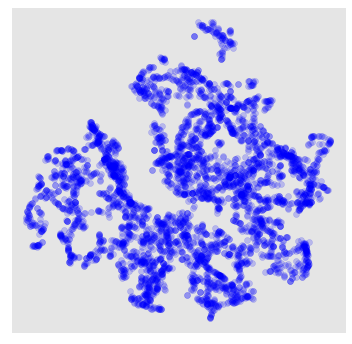

3.0
[1. 2. 3. ... 0. 0. 2.]


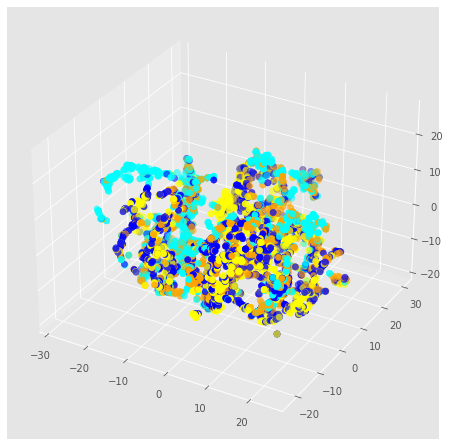

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();
#----------------------------
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
colores=['cyan','orange','blue','yellow']
asignar=[]
print(y_price[0])
y_pintar=y_price[random_idx]
print(y_pintar)
for row in y_pintar.astype('int32'):
    asignar.append(colores[row])

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=asignar,s=40)
#ax.scatter(X_new[:, 1], X_new[:, 2], X_new[:, 0], c=asignar,s=20)

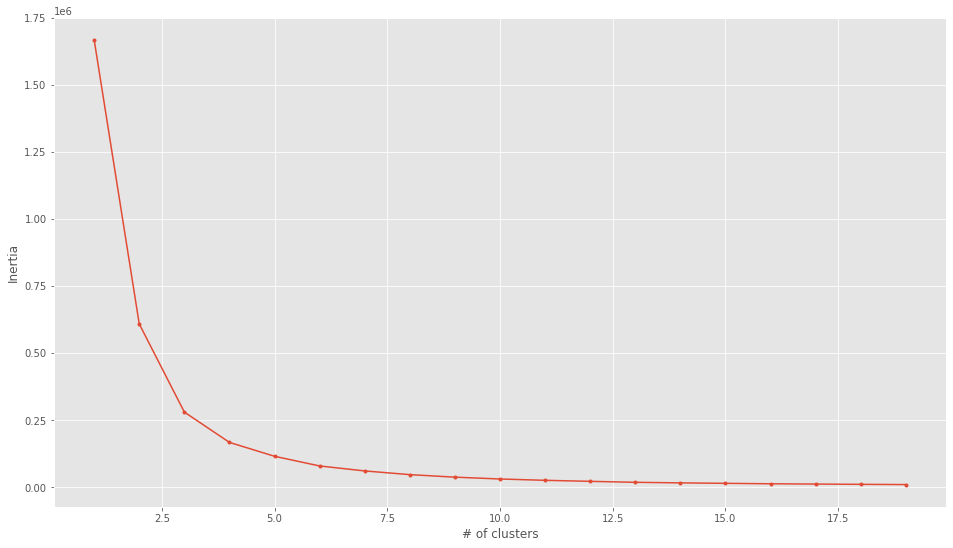

In [8]:
from sklearn.cluster import KMeans


K = range(1,20)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_new)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
len(Xs[1])
Xs[1]

array([-1.04642044, -1.29629145, -0.81774438, -1.81594311, -0.14037635,
       -0.84765389, -0.13153875,  0.0023702 ])

Cluster sizes k-means: [14753 10013  2290]
Cluster distances k-means: [2484415.34, 2069834.93, 11057235.12]


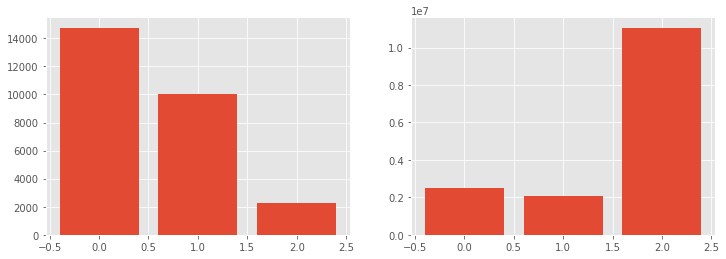

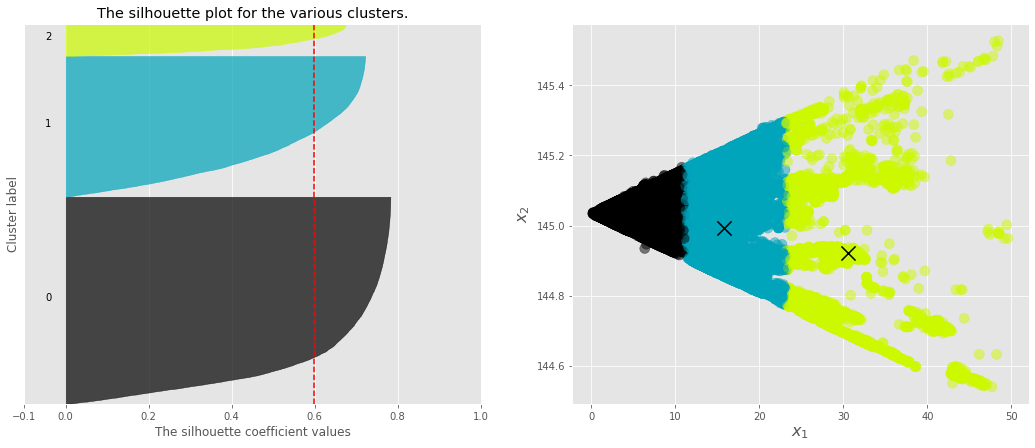

In [10]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(X_new)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((X_new - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

plot_silhouette(X_new,k,kmeans.labels_,kmeans.cluster_centers_)





ValueError: 'c' argument has 27056 elements, which is inconsistent with 'x' and 'y' with size 5000.

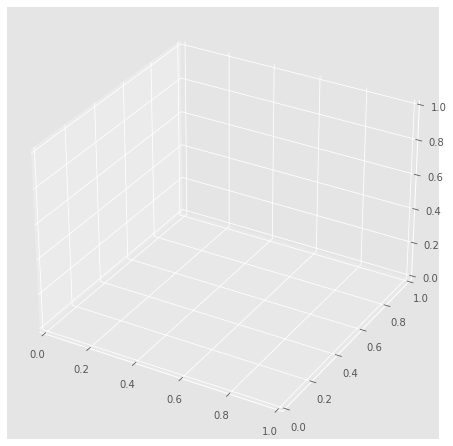

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

colores=['cyan','orange','blue','yellow']
asignarx=[]

for row in labels_km.astype('int32'):
    asignarx.append(colores[row])

ax.scatter(X_tsne[:, 1], X_tsne[:, 2], X_tsne[:, 0], c=asignarx,s=20)
data_RF['cluster']=labels_km



sb.pairplot(data_RF.dropna(), hue='cluster',size=4,vars=["Lattitude","Distancia_NEW","Longtitude","cat_precio"],kind='scatter')

In [ ]:
def close_to_far_from_center(X,centroid, n=10):
    
    distance = np.sum((X - centroid) ** 2, axis=1)
    
    print('Close to center')
    display(data_RF.iloc[np.argsort(distance)[:n]])
    
    print('Far from center')
    display(data_RF.iloc[np.argsort(distance)[-n:]])
    

In [ ]:

from scipy import stats
close_to_far_from_center(X_new,kmeans.cluster_centers_[2])
#stats.describe(kmeans.cluster_centers_[1].Price.sort())



In [ ]:
feature = 'Price'
col_number = feature_names.index(feature)

plt.figure(figsize=(15,10))
for l in np.unique(labels_km):
    
    plt.subplot(2,5,l+1)
    plt.hist(X[labels_km == l,col_number],bins = 50, density=True)
    plt.xlabel(feature)
    plt.title('Cluster #' + str(l))

plt.show()

In [ ]:
k = 8
kmeans = KMeans(n_clusters=k).fit(X)
plot_silhouette(X,k,kmeans.labels_,kmeans.cluster_centers_)